<div class="alert alert-block alert-info">
<center><strong>MÉTODOS NUMÉRICOS</strong></center>
<center>LISTA 06</center>
<center>ALUNO: <strong>JHONATAN GUILHERME OLIVEIRA PEREIRA</strong></center>
</div>

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.optimize as opt

## Questão 1

### Ponto fixo

In [24]:
func = lambda x: np.exp(-x)

In [25]:
def fixed_point_method(func, initial_value: float, tolerance: float=1e-1, max_iterations: int=200):
  counter, error, x = 0, 1, initial_value

  while tolerance < error and counter < max_iterations:
    y_x = func(x)

    if y_x == 0:
      break

    error = np.abs((y_x - x) / y_x)
    x = y_x

    counter += 1
  print(f"iterations: {counter}\n      root: {x}")

In [26]:
fixed_point_method(func, 0)

iterations: 7
      root: 0.5796123355033789


In [27]:
opt.fixed_point(func, x0=0, xtol=1e-1, method="iteration", maxiter=7)

0.5796123355033789

### Newton-Raphson

In [28]:
func = lambda x: np.exp(-x) - x
d_func = lambda x: -np.exp(-x) - 1

In [29]:
def newton_raphson_method(func, d_func, initial_value: float, tolerance: float=1e-4, max_iterations: int=200):
  counter, error, previous_x = 0, 1, initial_value

  while tolerance < error and counter < max_iterations:
    y_x, y_dx = func(previous_x), d_func(previous_x)
    
    if y_x == 0:
      break

    x = previous_x - (y_x / y_dx)
    error = np.abs((x - previous_x) / x)
    previous_x = x
    
    counter += 1
  print(f"iterations: {counter}\n      root: {x}")
  

In [30]:
newton_raphson_method(func, d_func, 0)

iterations: 4
      root: 0.5671432904097811


In [31]:
opt.root_scalar(func, fprime=d_func, x0=0, method="newton")

      converged: True
           flag: 'converged'
 function_calls: 10
     iterations: 5
           root: 0.567143290409784

In [32]:
newton_raphson_method(func, d_func, -8)

iterations: 12
      root: 0.5671432904097838


In [33]:
opt.root_scalar(func, fprime=d_func, x0=-8, method='newton')

      converged: True
           flag: 'converged'
 function_calls: 24
     iterations: 12
           root: 0.5671432904097838

### Secante

In [34]:
func = lambda x: np.cos(x) - x

In [35]:
def secant_method(func, x0: float, x1: float, tolerance: float=1e-4, max_iterations: int=200):
  counter, error, x = 0, 1, x0

  while tolerance < error and counter < max_iterations:
    y_x0 = func(x0)
    y_x1 = func(x1)

    if y_x0 == 0 or y_x1 == 0:
      break

    x = x0 - y_x0 * ((x1 - x0) / (y_x1 - y_x0))
    error = np.abs((x - x1) / x)
    x0 = x1
    x1 = x

    counter += 1
  print(f"iterations: {counter}\n      root: {x}")

In [36]:
secant_method(func, 0.3, 1.2)

iterations: 4
      root: 0.7390851050946504


In [37]:
opt.root_scalar(func, method='secant', x0=0.3, x1=1.2)

      converged: True
           flag: 'converged'
 function_calls: 7
     iterations: 6
           root: 0.7390851332151607

## Questão 2

In [38]:
func = lambda x: 2 * np.sin(np.sqrt(x)) - x

In [39]:
fixed_point_method(func, 0.5, 0.00001)

iterations: 9
      root: 0.7686497675264468


In [40]:
opt.fixed_point(func, x0=0.5, xtol=0.00001)

array(0.76864886)

## Questão 3

In [41]:
func = lambda x: (2 * x ** 3) - (11.7 * x ** 2) + (17.7 * x) - 5

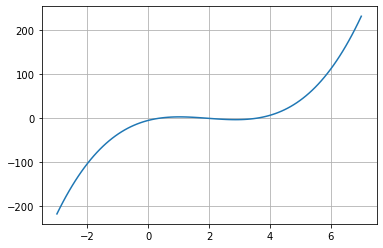

In [42]:
x = np.linspace(-3, 7, 100)
plt.plot(x, func(x))
plt.grid()

In [43]:
fixed_point_method(func, 3, max_iterations=3)

iterations: 3
      root: -30850678.958379168


In [44]:
try:
  opt.fixed_point(func, x0=3, method="iteration", maxiter=3)
except RuntimeError:
  print("Falhou.")

Falhou.


In [45]:
d_func = lambda x: (6 * x ** 2) - (23.4 * x) + 17.7

In [46]:
newton_raphson_method(func, d_func, 3, max_iterations=3)

iterations: 3
      root: 3.7929344806432264


In [47]:
opt.root_scalar(func, fprime=d_func, x0=3, maxiter=3)

      converged: False
           flag: 'convergence error'
 function_calls: 6
     iterations: 3
           root: 3.7929344806432264

In [48]:
secant_method(func, 4, 3, max_iterations=3)

iterations: 3
      root: 3.5037095168646224


In [49]:
opt.root_scalar(func, x0=4, x1=3, maxiter=3, method="secant")

      converged: False
           flag: 'convergence error'
 function_calls: 5
     iterations: 3
           root: 3.5862753847117346

## Questão 4

In [50]:
def bisection_method(a:float, b:float, func, iter:int=200, tol:float=1e-10):
  x = erro = counter = 1
  y_a = np.sign(func(a))
  y_b = np.sign(func(b))

  while erro > tol:
    if y_a * y_b > 0:
      print("Não existe raiz no intervalo.")
      return None
    elif y_a * y_b == 0:
      print(f"Raiz encontrada: {a, b}")
    
    previous_x = x
    x = (a + b) / 2
    y_x = func(x)

    if y_x == 0:
      print(f"Raiz encontrada: {y_x}")
      return None
    
    counter += 1
    if counter >= iter: break
    
    if y_a * y_x < 0:
      b = x
      y_b = y_x
    elif y_x * y_b < 0:
      a = x
      y_a = y_x
    erro = abs((x - previous_x) / x)
  return x

In [51]:
def false_position_method(a:float, b:float, func, iter:int=200, tol:float=1e-10):
  x = erro = counter = 1
  y_a = np.sign(func(a))
  y_b = np.sign(func(b))

  while erro > tol:
    if y_a * y_b > 0:
      print("Não existe raiz no intervalo.")
      return None
    elif y_a * y_b == 0:
      print(f"Raiz encontrada: {a, b}")
    
    previous_x = x
    x = (a + b) / 2
    x = b - ((y_b * (a - b)) / (y_a - y_b))
    y_x = func(x)

    if y_x == 0:
      print(f"Raiz encontrada: {y_x}")
      return None
    
    counter += 1
    if counter >= iter: break
    
    if y_a * y_x < 0:
      b = x
      y_b = y_x
    elif y_x * y_b < 0:
      a = x
      y_a = y_x
    erro = abs((x - previous_x) / x)
  return x

In [52]:
tol = 1e-10
max_iterations = 200

### a)

In [53]:
func = lambda x: (2 * x ** 4) + (4 * x ** 3) + (3 * x ** 2) - (10 * x) - 15
g_func = lambda x: ((2 * x ** 4) + (4 * x ** 3) + (3 * x ** 2) - 15) / 10
d_func = lambda x: (8 * x ** 3) + (12 * x ** 2) + (6 * x) - 10
x0, x1 = 0, 3

In [54]:
%%time
bisection_method(x0, x1, func, tol=tol, iter=max_iterations)

Wall time: 0 ns


1.4928787086100783

In [55]:
%%time
false_position_method(x0, x1, func, tol=tol, iter=max_iterations)

Wall time: 998 µs


1.4928787086635662

In [56]:
%%time
fixed_point_method(g_func, x0, tolerance=tol, max_iterations=max_iterations)

iterations: 35
      root: -1.3003841326707946
Wall time: 0 ns


In [57]:
%%time
newton_raphson_method(func, d_func, x0, tolerance=tol, max_iterations=max_iterations)

iterations: 6
      root: -1.3003841326439198
Wall time: 1 ms


In [58]:
%%time
secant_method(func, x0, x1, tolerance=tol, max_iterations=max_iterations)

iterations: 11
      root: -1.3003841326439198
Wall time: 1e+03 µs


### b)

In [69]:
func = lambda x: (x + 3) * (x + 1) * ((x - 2) ** 3)
g_func = lambda x: ((x + 3) * (x + 1) * ((x - 2) ** 3) / x)
d_func = lambda x: ((x - 2) ** 3) * (x + 1) + ((x - 2) ** 3) * (x + 3) + 3 * ((x - 2) ** 2) * (x + 1) * (x + 3)
x0, x1 = 0, 5

In [60]:
%%time
bisection_method(x0, x1, func, tol=tol, iter=max_iterations)

Wall time: 0 ns


1.9999999999708962

In [61]:
%%time
false_position_method(x0, x1, func, tol=tol, iter=max_iterations)

Wall time: 993 µs


2.039366799953946

In [68]:
%%time
fixed_point_method(g_func, x0, tolerance=tol, max_iterations=max_iterations)

ZeroDivisionError: division by zero

In [ ]:
%%time
newton_raphson_method(func, d_func, x0, tolerance=tol, max_iterations=max_iterations)

iterations: 60
      root: 2.00000000031569
Wall time: 998 µs


In [ ]:
%%time
secant_method(func, x0, x1, tolerance=tol, max_iterations=max_iterations)

iterations: 75
      root: 2.0000000005693157
Wall time: 0 ns


### c)

In [70]:
func = lambda x: (5 * x ** 3) + (x ** 2) - np.exp(1 - 2 * x) + np.cos(x) + 20
g_func = lambda x: 5*x**3 + x**2 - np.exp(1-2*x) + np.cos(x) + 20 + x
d_func = lambda x: 15*x**2 + 2*x + 2*np.exp(1-2*x) - np.sin(x)
x0, x1 = -5, 5

In [71]:
%%time
bisection_method(x0, x1, func, tol=tol, iter=max_iterations)

Não existe raiz no intervalo.
Wall time: 0 ns


In [72]:
%%time
false_position_method(x0, x1, func, tol=tol, iter=max_iterations)

Não existe raiz no intervalo.
Wall time: 0 ns


In [73]:
%%time
fixed_point_method(g_func, x0, tolerance=tol, max_iterations=max_iterations)

iterations: 6
      root: inf
Wall time: 0 ns


C:\Users\John\AppData\Local\Temp/ipykernel_15740/1338509491.py:2: RuntimeWarning: overflow encountered in double_scalars
  g_func = lambda x: 5*x**3 + x**2 - np.exp(1-2*x) + np.cos(x) + 20 + x
C:\Users\John\AppData\Local\Temp/ipykernel_15740/884430049.py:10: RuntimeWarning: invalid value encountered in double_scalars
  error = np.abs((y_x - x) / y_x)


In [74]:
%%time
newton_raphson_method(func, d_func, x0, tolerance=tol, max_iterations=max_iterations)

iterations: 11
      root: -0.9295604598378412
Wall time: 0 ns


In [75]:
%%time
secant_method(func, x0, x1, tolerance=tol, max_iterations=max_iterations)

iterations: 14
      root: -0.9295604598378412
Wall time: 967 µs


### d)

In [94]:
func = lambda x: np.sin(x) * x + 4
g_func = lambda x: np.sin(x) * x + 4 + x
d_func = lambda x: np.cos(x) * x + np.sin(x)
x0, x1 = 1, 5

In [95]:
%%time
bisection_method(x0, x1, func, tol=tol, iter=max_iterations)

Wall time: 0 ns


4.323239543708041

In [96]:
%%time
false_position_method(x0, x1, func, tol=tol, iter=max_iterations)

Wall time: 0 ns


4.323239543756014

In [97]:
%%time
fixed_point_method(g_func, x0, tolerance=tol, max_iterations=max_iterations)

iterations: 200
      root: 4.106928407423327
Wall time: 994 µs


In [98]:
%%time
newton_raphson_method(func, d_func, x0, tolerance=tol, max_iterations=max_iterations)

iterations: 8
      root: -5.461308012588998
Wall time: 0 ns


In [99]:
%%time
secant_method(func, x0, x1, tolerance=tol, max_iterations=max_iterations)

iterations: 8
      root: 4.323239543713714
Wall time: 0 ns


### e)

In [100]:
func = lambda x: (x - 3) ** 5 * np.log(x)
g_func = lambda x: (x - 3) ** 5 * np.log(x) + x
d_func = lambda x: 5 * np.log(x) * ((x - 3) ** 4) + ((x - 3) ** 5 / x)
x0, x1 = 2, 5

In [101]:
%%time
bisection_method(x0, x1, func, tol=tol, iter=max_iterations)

Wall time: 0 ns


2.9999999999417923

In [102]:
%%time
false_position_method(x0, x1, func, tol=tol, iter=max_iterations)

Wall time: 999 µs


3.1713129708379406

In [103]:
%%time
fixed_point_method(g_func, x0, tolerance=tol, max_iterations=max_iterations)

iterations: 3
      root: nan
Wall time: 1.02 ms


C:\Users\John\AppData\Local\Temp/ipykernel_15740/4282997812.py:2: RuntimeWarning: invalid value encountered in log
  g_func = lambda x: (x - 3) ** 5 * np.log(x) + x


In [104]:
%%time
newton_raphson_method(func, d_func, x0, tolerance=tol, max_iterations=max_iterations)

iterations: 92
      root: 2.9999999989287707
Wall time: 0 ns


In [105]:
%%time
secant_method(func, x0, x1, tolerance=tol, max_iterations=max_iterations)

iterations: 131
      root: 2.9999999982814263
Wall time: 1.03 ms


### f)

In [106]:
func = lambda x: (x ** 10) - 1
g_func = lambda x: (x ** 10) - 1 + x
d_func = lambda x: 10 * x ** 9
x0, x1 = 0.8, 1.2

In [107]:
%%time
bisection_method(x0, x1, func, tol=tol, iter=max_iterations)

Raiz encontrada: 0.0
Wall time: 1.01 ms


In [108]:
%%time
false_position_method(x0, x1, func, tol=tol, iter=max_iterations)

Raiz encontrada: 0.0
Wall time: 999 µs


In [109]:
%%time
fixed_point_method(g_func, x0, tolerance=tol, max_iterations=max_iterations)

OverflowError: (34, 'Result too large')

In [110]:
%%time
newton_raphson_method(func, d_func, x0, tolerance=tol, max_iterations=max_iterations)

iterations: 10
      root: 1.0
Wall time: 0 ns


In [111]:
%%time
secant_method(func, x0, x1, tolerance=tol, max_iterations=max_iterations)

iterations: 11
      root: 1.0
Wall time: 1 ms
